In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [25]:
#
df = pd.read_csv('Advertising.csv')  # CSV with columns: TV, Radio, Newspaper, Sales
print(df.head())
print('\n')
print(df.describe())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


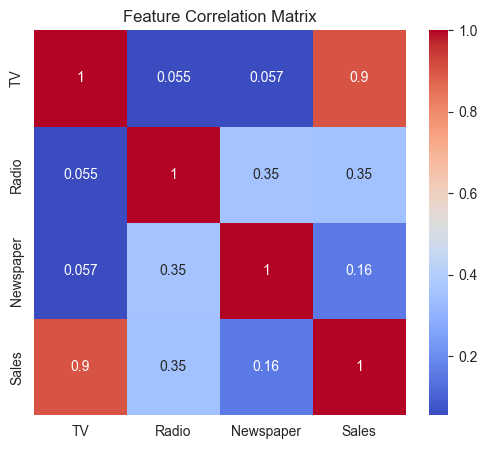

In [23]:
#EDA
# Correlation heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

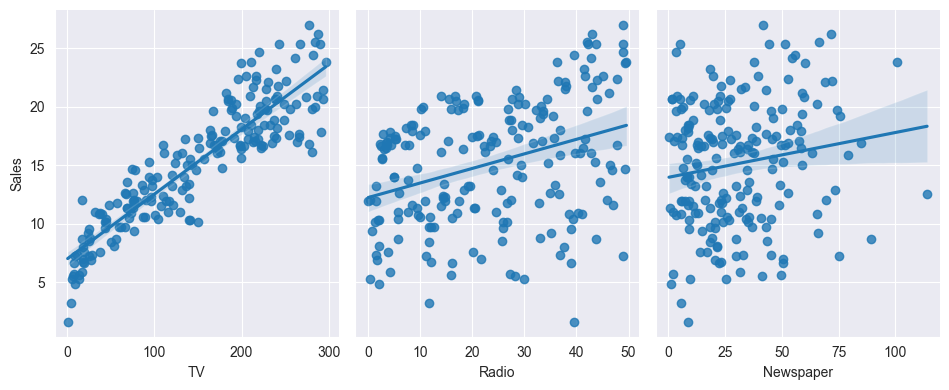

In [26]:
# Scatterplots with Sales target
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=0.8, kind='reg')
plt.tight_layout()
plt.show()

In [20]:
# Based on correlation: TV has strongest, Radio moderately, Newspaper weakest.
X_all = df[['TV', 'Radio', 'Newspaper']]
X_tv_radio = df[['TV', 'Radio']]
X_tv = df[['TV']]

y = df['Sales']

In [21]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# -------------------- Train/Test Splits --------------------
def split_data(X, y):
    return train_test_split(X, y, test_size=0.25, random_state=42)

# Split for different feature sets
X_train_all, X_test_all, y_train, y_test = split_data(X_all, y)
X_train_tr, X_test_tr, _, _ = split_data(X_tv_radio, y)
X_train_t, X_test_t, _, _ = split_data(X_tv, y)

In [14]:
# -------------------- Train & Evaluate Function --------------------
def evaluate_lr(X_train, X_test, y_train, y_test, label):
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    cv_scores = cross_val_score(lr, X_all, y, cv=10, scoring='r2')

    print(f"\n{label} Model Performance:")
    print(f"R²: {r2:.3f}, RMSE: {rmse:.3f}")
    print(f"Cross‑Val R² Avg: {cv_scores.mean():.3f}")

    # Plot Actual vs Predicted
    plt.figure(figsize=(5, 4))
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
    plt.xlabel('Actual Sales')
    plt.ylabel('Predicted Sales')
    plt.title(f'Actual vs Predicted: {label}')
    plt.show()


All Features Model Performance:
R²: 0.912, RMSE: 1.551
Cross‑Val R² Avg: 0.892


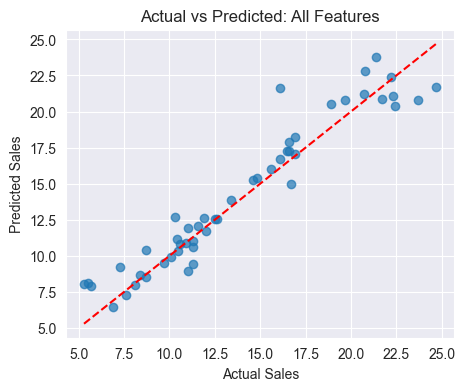


TV & Radio Model Performance:
R²: 0.913, RMSE: 1.535
Cross‑Val R² Avg: 0.892


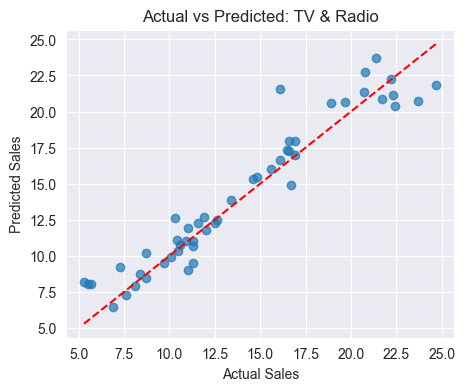


TV Only Model Performance:
R²: 0.797, RMSE: 2.348
Cross‑Val R² Avg: 0.892


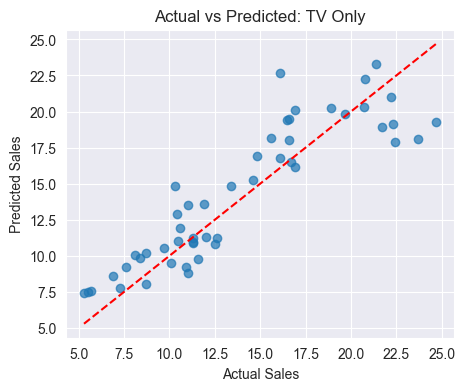

In [15]:
# -------------------- Evaluate All Models --------------------
evaluate_lr(X_train_all, X_test_all, y_train, y_test, 'All Features')
evaluate_lr(X_train_tr, X_test_tr, y_train, y_test, 'TV & Radio')
evaluate_lr(X_train_t, X_test_t, y_train, y_test, 'TV Only')